### How to Load and Manipulate Images for Deep Learning in Python With PIL/Pillow
by Jason Brownlee on March 22, 2019 in Deep Learning for Computer Vision

https://machinelearningmastery.com/how-to-load-and-manipulate-images-for-deep-learning-in-python-with-pil-pillow/

In [38]:
# check Pillow version number
import PIL
print('Pillow Version:', PIL.__version__)

# load and show an image with Pillow
from PIL import Image

# load and display an image with Matplotlib
import matplotlib.pyplot as plt
from matplotlib import image
from matplotlib import pyplot

import imageio  

# load image and convert to and from NumPy array
from numpy import asarray

Pillow Version: 8.3.1


### How to Load and Display Images
We need a test image to demonstrate some important features of using the Pillow library.

In this tutorial, we will use a photograph of the Sydney Opera House, taken by Ed Dunens and made available on Flickr under a creative commons license, some rights reserved.

In [32]:
image_name = 'Sydney-Opera-House.jpg'

JPEG
RGB
(640, 360)


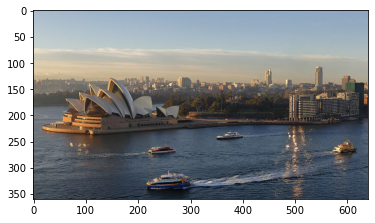

In [34]:
# load the image
image = Image.open('Sydney-Opera-House.jpg')
# summarize some details about the image
print(image.format)
print(image.mode)
print(image.size)
# show the image
plt.imshow(image)
#image.show()

### How to Convert Images to NumPy Arrays and Back
Often in machine learning, we want to work with images as NumPy arrays of pixel data.

With Pillow installed, you can also use the Matplotlib library to load the image and display it within a Matplotlib frame.

This can be achieved using the imread() function that loads the image an array of pixels directly and the imshow() function that will display an array of pixels as an image.

The example below loads and displays the same image using Matplotlib that, in turn, will use Pillow under the covers.

Running the example first loads the image and then reports the data type of the array, in this case, 8-bit unsigned integers, then reports the shape of the array, in this case, 360 pixels wide by 640 pixels high and three channels for red, green, and blue.

uint8
(360, 640, 3)


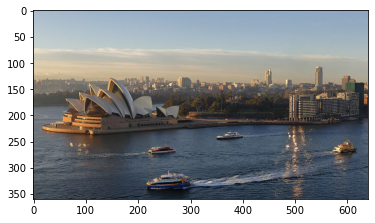

In [40]:
# load image as pixel array
data = imageio.imread('Sydney-Opera-House.jpg')
# summarize shape of the pixel array
print(data.dtype)
print(data.shape)
# display the array of pixels as an image
plt.imshow(data)
plt.show()

### The Matplotlib wrapper functions can be more effective than using Pillow directly.

Nevertheless, you can access the pixel data from a Pillow Image. Perhaps the simplest way is to construct a NumPy array and pass in the Image object. The process can be reversed converting a given array of pixel data into a Pillow Image object using the Image.fromarray() function. This can be useful if image data is manipulated as a NumPy array and you then want to save it later as a PNG or JPEG file.

The example below loads the photo as a Pillow Image object and converts it to a NumPy array, then converts it back to an Image object again.

Running the example first loads the photo as a Pillow image then converts it to a NumPy array and reports the shape of the array. Finally, the array is converted back into a Pillow image and the details are reported.

In [41]:
# load the image
image = Image.open('Sydney-Opera-House.jpg')
# convert image to numpy array
data = asarray(image)
# summarize shape
print(data.shape)
# create Pillow image
image2 = Image.fromarray(data)
# summarize image details
print(image2.format)
print(image2.mode)
print(image2.size)

(360, 640, 3)
None
RGB
(640, 360)


For example, you could easily load all images in a directory as a list as follows:

In [42]:
# load all images in a directory
from os import listdir
from matplotlib import image

dir_path = '../data/examples'

# load all images in a directory
loaded_images = list()
for filename in listdir(dir_path):
    # load image
    img_data = image.imread(dir_path+'/'+ filename)
    # store loaded image
    loaded_images.append(img_data)
    print('> loaded %s %s' % (filename, img_data.shape))

> loaded 00a1ae8867e0bb89f061679e1cf29e80.jpg (960, 467, 3)
> loaded 00a1e0c0f89ff89a8f32d42e9025f6b2.jpg (853, 1280, 3)
> loaded 00a6d367daed96f77be6c91db493dfed.jpg (960, 720, 3)
> loaded 00b151a572c9aabedf8cfce0fa18be25.jpg (960, 540, 3)
> loaded 00c7b596627da7425b624d6b16c88a25.jpg (960, 960, 3)
> loaded 00d1cb2ec8b263ae076ff95cae513a88.jpg (960, 720, 3)
> loaded 00d560ebe5e1b2450eb530a2c96d08a3.jpg (939, 1242, 3)
> loaded 00ddc7582953fb2c862e751e2b5d45f0.jpg (960, 828, 3)
> loaded 00df0a668441b10869f4372fd15c14f5.jpg (816, 464, 3)
> loaded 00dff6959ce41208a9e0528744162332.jpg (960, 540, 3)
> loaded 00e75416298ca240f7746181ee196600.jpg (960, 720, 3)
> loaded 00e75d192cd4b26798933a817b04ccd9.jpg (960, 720, 3)
> loaded 00e83013f21b99cd7edb1d4e545f6579.jpg (960, 682, 3)
> loaded 00eb7cc3d158a6addbcbde1f267d7d15.jpg (850, 1280, 3)
> loaded 00f6f38380bec413074150c18b2828d2.jpg (960, 720, 3)


### How to Save Images to File
An image object can be saved by calling the save() function.

This can be useful if you want to save an image in a different format, in which case the ‘format‘ argument can be specified, such as PNG, GIF, or PEG.

For example, the code listing below loads the photograph in JPEG format and saves it in PNG format.

In [43]:
# example of saving an image in another format
from PIL import Image
# load the image
image = Image.open(image_name)
# save as PNG format
image.save('opera_house.png', format='PNG')
# load the image again and inspect the format
image2 = Image.open('opera_house.png')
print(image2.format)

PNG


### Convering Image to Gray Scale
Saving images is useful if you perform some data preparation on the image before modeling. One example is converting color images (RGB channels) to grayscale (1 channel).

There are a number of ways to convert an image to grayscale, but Pillow provides the convert() function and the mode ‘L‘ will convert an image to grayscale.

In [47]:
# example of saving a grayscale version of a loaded image
from PIL import Image
# load the image
image = Image.open(image_name)
# convert the image to grayscale
gs_image = image.convert(mode='L')
# save in jpeg format
gs_image.save('opera_house_grayscale.jpg')
# load the image again and show it
image2 = Image.open('opera_house_grayscale.jpg')
# show the image
image2.show()
#plt.imshow(image2)
#plt.show()

### How to Resize Images
It is important to be able to resize images before modeling.

Sometimes it is desirable to thumbnail all images to have the same width or height. This can be achieved with Pillow using the thumbnail() function. The function takes a tuple with the width and height and the image will be resized so that the width and height of the image are equal or smaller than the specified shape.

For example, the test photograph we have been working with has the width and height of (640, 360). We can resize it to (100, 100), in which case the largest dimension, in this case, the width, will be reduced to 100, and the height will be scaled in order to retain the aspect ratio of the image.

The example below will load the photograph and create a smaller thumbnail with a width and height of 100 pixels.

In [48]:
# create a thumbnail of an image
from PIL import Image
# load the image
image = Image.open(image_name)
# report the size of the image
print(image.size)
# create a thumbnail and preserve aspect ratio
image.thumbnail((100,100))
# report the size of the thumbnail
print(image.size)

(640, 360)
(100, 56)


##### Resizing without retaining size ratio
We may not want to preserve the aspect ratio, and instead, we may want to force the pixels into a new shape.

This can be achieved using the resize() function that allows you to specify the width and height in pixels and the image will be reduced or stretched to fit the new shape.

The example below demonstrates how to resize a new image and ignore the original aspect ratio.

The sized of the image is shown and we can see that the wide photograph has been compressed into a square, although all of the features are still quite visible and obvious.

Standard resampling algorithms are used to invent or remove pixels when resizing, and you can specify a technique, although default is a bicubic resampling algorithm that suits most general applications.

In [50]:
# resize image and force a new shape
from PIL import Image
# load the image
image = Image.open(image_name)
# report the size of the image
print(image.size)
# resize image and ignore original aspect ratio
img_resized = image.resize((200,200))
# report the size of the thumbnail
print(img_resized.size)
img_resized.show()

(640, 360)
(200, 200)


### How to Flip, Rotate, and Crop Images
Simple image manipulation can be used to create new versions of images that, in turn, can provide a richer training dataset when modeling.

Generally, this is referred to as data augmentation and may involve creating flipped, rotated, cropped, or other modified versions of the original images with the hope that the algorithm will learn to extract the same features from the image data regardless of where they might appear.

You may want to implement your own data augmentation schemes, in which case you need to know how to perform basic manipulations of your image data.

#### Flip Image
An image can be flipped by calling the flip() function and passing in a method such as FLIP_LEFT_RIGHT for a horizontal flip or FLIP_TOP_BOTTOM for a vertical flip. Other flips are also available

The example below creates both horizontal and vertical flipped versions of the image.

Running the example loads the photograph and creates horizontal and vertical flipped versions of the photograph, then plots all three versions as subplots using Matplotlib.

You will note that the imshow() function can plot the Image object directly without having to convert it to a NumPy array.

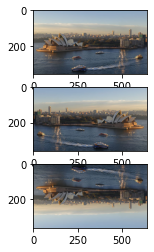

In [51]:
# create flipped versions of an image
from PIL import Image
from matplotlib import pyplot
# load image
image = Image.open(image_name)
# horizontal flip
hoz_flip = image.transpose(Image.FLIP_LEFT_RIGHT)
# vertical flip
ver_flip = image.transpose(Image.FLIP_TOP_BOTTOM)
# plot all three images using matplotlib
pyplot.subplot(311)
pyplot.imshow(image)
pyplot.subplot(312)
pyplot.imshow(hoz_flip)
pyplot.subplot(313)
pyplot.imshow(ver_flip)
pyplot.show()

#### Rotate Image
An image can be rotated using the rotate() function and passing in the angle for the rotation.

The function offers additional control such as whether or not to expand the dimensions of the image to fit the rotated pixel values (default is to clip to the same size), where to center the rotation the image (default is the center), and the fill color for pixels outside of the image (default is black).

The example below creates a few rotated versions of the image.

Running the example plots the original photograph, then a version of the photograph rotated 45 degrees, and another rotated 90 degrees.

You can see that in both rotations, the pixels are clipped to the original dimensions of the image and that the empty pixels are filled with black color.

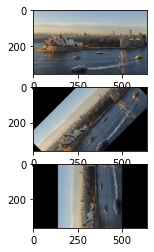

In [52]:
# create rotated versions of an image
from PIL import Image
from matplotlib import pyplot
# load image
image = Image.open(image_name)
# plot original image
pyplot.subplot(311)
pyplot.imshow(image)
# rotate 45 degrees
pyplot.subplot(312)
pyplot.imshow(image.rotate(45))
# rotate 90 degrees
pyplot.subplot(313)
pyplot.imshow(image.rotate(90))
pyplot.show()

#### Cropped Image
An image can be cropped: that is, a piece can be cut out to create a new image, using the crop() function.

The crop function takes a tuple argument that defines the two x/y coordinates of the box to crop out of the image. For example, if the image is 2,000 by 2,000 pixels, we can clip out a 100 by 100 box in the middle of the image by defining a tuple with the top-left and bottom-right points of (950, 950, 1050, 1050).

The example below demonstrates how to create a new image as a crop from a loaded image.

Running the example creates a cropped square image of 100 pixels starting at 100,100 and extending down and left to 200,200. The cropped square is then displayed.

In [53]:
# example of cropping an image
from PIL import Image
# load image
image = Image.open(image_name)
# create a cropped image
cropped = image.crop((100, 100, 200, 200))
# show cropped image
cropped.show()